# VAS Ratings Analysis
This notebook analyzes VAS ratings from the experiment CSV files, summarizes them, computes statistics, and visualizes the results.

## 1. Import Required Libraries
Import pandas, numpy, and matplotlib for data analysis and visualization.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

## 2. Load and Combine Experiment CSV Files
Load all relevant CSV files and combine the VAS ratings into a single DataFrame.

In [7]:
# Load all CSV files and extract VAS ratings (slider.rating if available)
csv_files = glob.glob('./Data/*.csv')
vas_frames = []
for file in csv_files:
    df = pd.read_csv(file, encoding='utf-8', delimiter=',', on_bad_lines='skip')
    # Prefer 'slider.rating' if present, else fallback to other VAS columns
    if 'slider.rating' in df.columns:
        vas_col = 'slider.rating'
    else:
        vas_cols = [col for col in df.columns if 'VAS' in col or 'ratingScenarioLoop.slider.rt' in col or 'response' in col]
        vas_col = vas_cols[0] if len(vas_cols) > 0 else None
    if vas_col is not None:
        temp = df[[vas_col]].copy()
        temp['file'] = file
        vas_frames.append(temp)
vas_df = pd.concat(vas_frames, ignore_index=True)
print(f'Combined VAS ratings from {len(csv_files)} files. First overview:')
print(vas_df.head())

KeyboardInterrupt: 

## 3. Statistical Analysis of VAS Ratings
Calculate mean, median, min/max, and visualize the distribution of VAS ratings.

VAS mean: 67.58018867924528
VAS median: 76.5
VAS min/max: 0.0 100.0


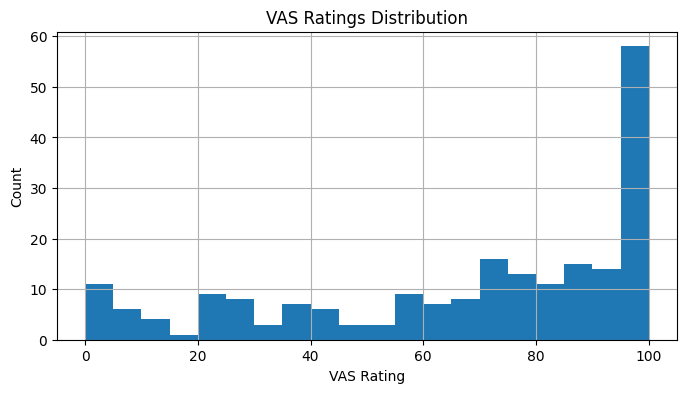

In [3]:
# Calculate statistical metrics and plot histogram
vas_col = vas_df.columns[0]  # Assume first column is VAS
print('VAS mean:', vas_df[vas_col].mean())
print('VAS median:', vas_df[vas_col].median())
print('VAS min/max:', vas_df[vas_col].min(), vas_df[vas_col].max())
plt.figure(figsize=(8,4))
vas_df[vas_col].hist(bins=20)
plt.title('VAS Ratings Distribution')
plt.xlabel('VAS Rating')
plt.ylabel('Count')
plt.show()

## 4. Grouping and Comparison by Condition
Compare VAS ratings by session, condition, or other variables if available.

In [4]:
# Example: Grouping by file (session)
vas_df['Session'] = vas_df['file'].apply(lambda x: x.split('/')[-1].split('_')[0])
session_stats = vas_df.groupby('Session')[vas_col].agg(['mean','median','std','count'])
print('VAS ratings by session:')
print(session_stats)

VAS ratings by session:
              mean  median        std  count
Session                                     
Data\01  67.580189    76.5  31.782707    212


## 5. Export and Visualization
Export the summarized VAS ratings and show further visualizations.

✓ Session statistics exported as CSV.


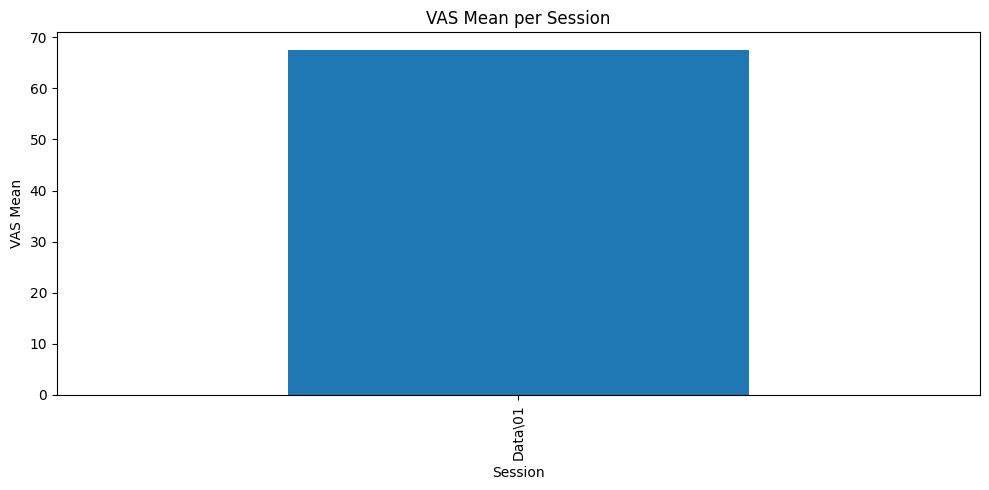

In [5]:
# Export session statistics as CSV
session_stats.to_csv('./results/vas_session_stats.csv')
print('✓ Session statistics exported as CSV.')
plt.figure(figsize=(10,5))
session_stats['mean'].plot(kind='bar')
plt.title('VAS Mean per Session')
plt.xlabel('Session')
plt.ylabel('VAS Mean')
plt.tight_layout()
plt.show()